In [1]:
#Initial Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Bring in sentiment data
sentiment = pd.read_csv('sentiment.csv')
sentiment = sentiment[['state', 'polarity', 'subjectivity']]
sentiment

,state,polarity,subjectivity
0,Alabama,0.185000,0.605000
1,Alaska,0.162500,0.347348
2,Arizona,0.125000,0.300000
3,Arkansas,0.271429,0.357143
4,California,0.126572,0.384251
5,Colorado,0.135271,0.403680
6,Florida,0.085744,0.353994
7,Georgia,0.180000,0.466667
8,Illinois,0.114205,0.213420
9,Indiana,0.125000,0.200000


In [3]:
#Bring in fares data
fares = pd.read_csv('fares.csv')
fares.head()

,Row Labels,Average of fares
0,Alaska,5.412090e+06
1,Alabama,4.423489e+05
2,Arkansas,4.847410e+05
3,Arizona,3.416877e+06
4,California,7.837840e+06


In [4]:
#Revise columns
fares.columns = ['state', 'fares']
fares.head()

,state,fares
0,Alaska,5.412090e+06
1,Alabama,4.423489e+05
2,Arkansas,4.847410e+05
3,Arizona,3.416877e+06
4,California,7.837840e+06


In [6]:
#Join sentiment and fares table
sentiment_fares = pd.merge(sentiment, fares, how='inner', on=['state'])
sentiment_fares

,state,polarity,subjectivity,fares
0,Alabama,0.185000,0.605000,4.423489e+05
1,Alaska,0.162500,0.347348,5.412090e+06
2,Arizona,0.125000,0.300000,3.416877e+06
3,Arkansas,0.271429,0.357143,4.847410e+05
4,California,0.126572,0.384251,7.837840e+06
5,Colorado,0.135271,0.403680,8.146218e+06
6,Florida,0.085744,0.353994,2.967230e+06
7,Georgia,0.180000,0.466667,4.936043e+06
8,Illinois,0.114205,0.213420,2.558870e+07
9,Indiana,0.125000,0.200000,1.421342e+06


### Start building regression model to see if we can predict fare income from polarity, then subjectivity

Text(0, 0.5, 'Fare Income')

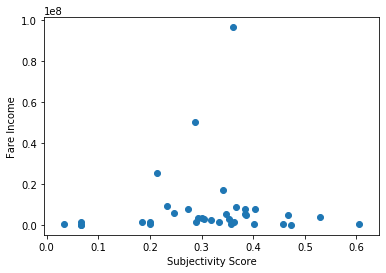

In [8]:
#Little EDA--scatter plot to see if this would be a good model
plt.scatter(sentiment_fares.subjectivity, sentiment_fares.fares)
plt.xlabel('Subjectivity Score')
plt.ylabel('Fare Income')

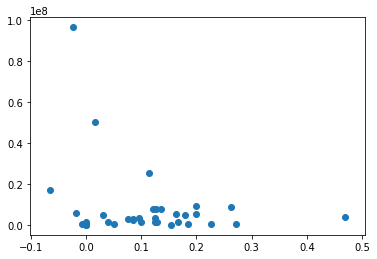

In [9]:
#polarity vs fares
plt.scatter(sentiment_fares.polarity, sentiment_fares.fares)

In [13]:
##EDA is looking like there may not be a very strong relationship, but can do model anyways just to see
#Model for polarity
#Split up data into features vs prediction thing
X = sentiment_fares[['polarity',
       'subjectivity']]
y = sentiment_fares[['fares']]

In [14]:
#Now, set up train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
#Now, set up training the model on training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Take a look at model coefficients
lm.coef_

array([[-1.22464613e+08,  6.01390779e+07]])

In [17]:
X_train.columns

Index(['polarity', 'subjectivity'], dtype='object')

In [18]:
#Now make predictions!
predictions = lm.predict(X_test)

Text(0, 0.5, 'model predictions')

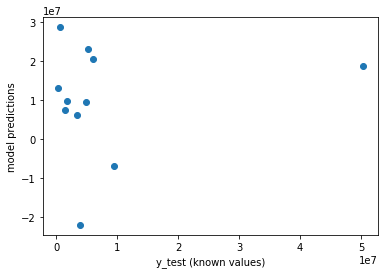

In [19]:
#Make scatter plot of y_test values vs predictions to see if the model is any good
plt.scatter(y_test, predictions)
plt.xlabel("y_test (known values)")
plt.ylabel("model predictions")
#Haha YIKES it's not very good

In [21]:
#Now do formal evaluation anyways
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [22]:
#Print final results
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 15339548.172815526
MSE: 321376430128209.4
RMSE: 17926974.929647483


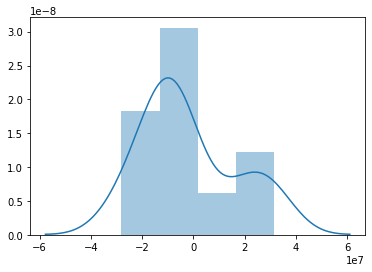

In [24]:
#Plot residuals to see if normally distributed
import seaborn as sns
sns.distplot((y_test-predictions))
#LOL NOT VERY NORMAL AT ALL OOF! 